# Importing our Packages

In [151]:
#Importing our Packages
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as rmse
import seaborn as sns

from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score


from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold

from sklearn.model_selection import KFold

import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from xgboost import plot_importance


# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy.stats import loguniform


In [2]:
#Load Libraries and Create engine Connection

import pymysql
import pandas as pd
import numpy as np
import sqlalchemy
import gc
engine =sqlalchemy.create_engine(
        sqlalchemy.engine.url.URL.create(
        drivername="mysql+pymysql",
        username='Estimators',  # e.g. "my-database-user"
        password='Estimator2021',  # e.g. "my-database-password"
        host='34.77.88.127',  # e.g. "127.0.0.1"
        port=3306,  # e.g. 3306
        database='Housing_France',  # e.g. "my-database-name"
    ))

conn = engine.connect().execution_options(stream_results=True)

In [3]:
#Load Libraries and Create engine Connection

import pymysql
import pandas as pd
import numpy as np
import sqlalchemy
import gc

def get_data(querystring,chunk):
    engine =sqlalchemy.create_engine(
    sqlalchemy.engine.url.URL.create(
    drivername="mysql+pymysql",
    username='Estimators',  # e.g. "my-database-user"
    password='Estimator2021',  # e.g. "my-database-password"
    host='34.77.88.127',  # e.g. "127.0.0.1"
    port=3306,  # e.g. 3306
    database='Housing_France',  # e.g. "my-database-name"
    ))
    conn = engine.connect().execution_options(stream_results=True)
    frame = pd.DataFrame()
    for chunk_dataframe in pd.read_sql(
            querystring, conn, chunksize=chunk):
            print(f"Got dataframe w/{len(chunk_dataframe)} rows")
            frame= frame.append(chunk_dataframe)
            # ... do something with dataframe ...
            
    return frame

In [4]:
#Template for getting some data
df = get_data("""select * from data_working_update WHERE nom_commune IN 
('Paris 9e Arrondissement','Paris 8e Arrondissement',
 'Paris 7e Arrondissement','Paris 6e Arrondissement',
 'Paris 5e Arrondissement', 'Paris 4e Arrondissement',
 'Paris 3e Arrondissement','Paris 2e Arrondissement',
 'Paris 20e Arrondissement', 'Paris 1er Arrondissement',
 'Paris 19e Arrondissement','Paris 18e Arrondissement',
 'Paris 17e Arrondissement',
 'Paris 16e Arrondissement', 'Paris 15e Arrondissement',
 'Paris 14e Arrondissement','Paris 13e Arrondissement',
 'Paris 12e Arrondissement', 'Paris 11e Arrondissement',
 'Paris 10e Arrondissement', 
 'Nice',
 'Marseille 9e Arrondissement','Marseille 8e Arrondissement', 'Marseille 7e Arrondissement',
 'Marseille 6e Arrondissement', 'Marseille 5e Arrondissement', 'Marseille 4e Arrondissement',
 'Marseille 3e Arrondissement', 'Marseille 2e Arrondissement','Marseille 1er Arrondissement',
 'Marseille 16e Arrondissement','Marseille 15e Arrondissement','Marseille 14e Arrondissement',
 'Marseille 13e Arrondissement', 'Marseille 12e Arrondissement','Marseille 11e Arrondissement',
 'Marseille 10e Arrondissement') """, 1000)

Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got datafram

In [5]:
data = df.copy()
data.columns

Index(['id_mutation', 'date_mutation', 'nature_mutation', 'valeur_fonciere',
       'adresse_nom_voie', 'adresse_code_voie', 'code_postal', 'code_commune',
       'nom_commune', 'code_departement', 'id_parcelle', 'type_local',
       'surface_reelle_bati', 'nombre_pieces_principales', 'surface_terrain',
       'longitude', 'latitude'],
      dtype='object')

In [6]:
data.shape

(292510, 17)

# Drop duplicates

## id_mutation

In [7]:
def drop_duplicates(df, col_name):
    return df.drop_duplicates(subset=[col_name])

data = drop_duplicates(df=data, col_name = 'id_mutation')
data.shape

(263337, 17)

In [8]:
df2 = data.copy()

In [9]:
df2.shape

(263337, 17)

In [10]:
prixmetr = df2['valeur_fonciere'].values / df2['surface_reelle_bati'].values
df2.loc[:,'prixmetre'] = prixmetr
df2.shape

(263337, 18)

# Visualization

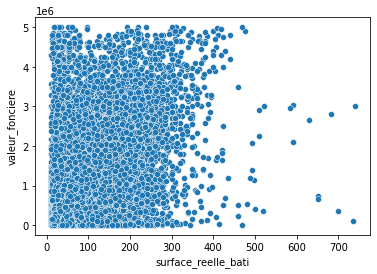

In [12]:
sns.scatterplot(x=df2['surface_reelle_bati'], y=df2['valeur_fonciere']);

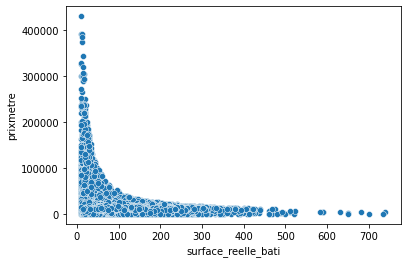

In [13]:
sns.scatterplot(x=df2['surface_reelle_bati'], y=df2['prixmetre']);

# Filter data, Removing outliers

In [14]:
df2=df2[
    (df2['prixmetre'] < 200_000) & (df2['prixmetre'] > 10_000)]
df2.shape

(70339, 18)

In [15]:
df2=df2[
    (df2['nombre_pieces_principales'] < 8) & (df2['nombre_pieces_principales'] > 0)]
df2.shape

(69884, 18)

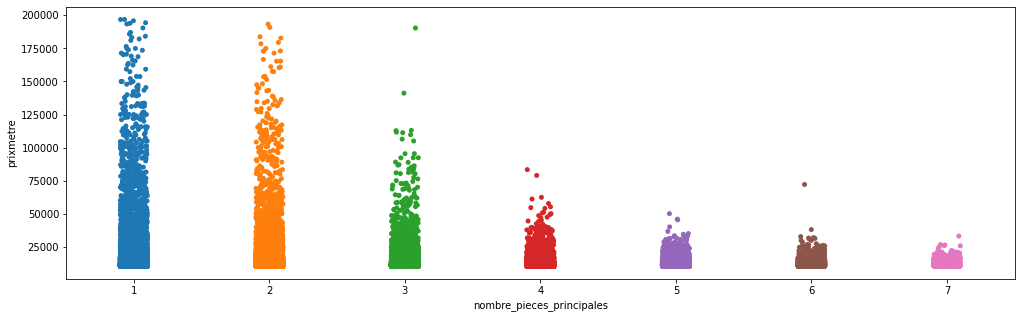

In [16]:
plt.figure(figsize=(17, 5)) 

sns.stripplot(x='nombre_pieces_principales', y='prixmetre',data=df2, size=5);

In [17]:
df2=df2[
    (df2['surface_reelle_bati'] < 250) & (df2['surface_reelle_bati'] > 10)]
df2.shape

(68898, 18)

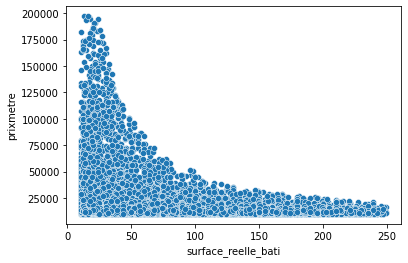

In [18]:
sns.scatterplot(x=df2['surface_reelle_bati'], y=df2['prixmetre']);

In [19]:
df2=df2[
    (df2['prixmetre'] < 150_000) & (df2['prixmetre'] > 10_000)]
df2.shape

(68840, 18)

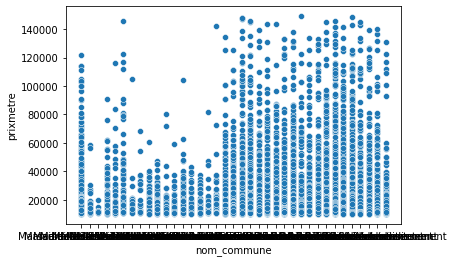

In [20]:
sns.scatterplot(x=df2['nom_commune'], y=df2['prixmetre']);

In [21]:
df2 = df2.drop(columns = 'nature_mutation')
df2.shape

(68840, 17)

In [22]:
df2.head()

,id_mutation,date_mutation,valeur_fonciere,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,id_parcelle,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,prixmetre
51,2016-36097,2016-01-05,1135000,RTE FORESTIERE,2547,6300,6088,Nice,6,06088000KH0264,Appartement,90,5,0,7.297634,43.689517,12611.111111
101,2016-36160,2016-02-01,390000,AV CAP DE NICE,1085,6300,6088,Nice,6,06088000KH0127,Appartement,30,2,0,7.296387,43.687529,13000.000000
155,2016-36245,2016-01-27,1600000,BD JEAN JAURES,3360,6300,6088,Nice,6,06088000KR0004,Appartement,20,2,108,7.274916,43.697602,80000.000000
172,2016-36258,2016-02-08,595000,RUE ALPHONSE KARR,0135,6000,6088,Nice,6,06088000KT0026,Appartement,52,2,0,7.266601,43.698670,11442.307692
192,2016-36283,2016-01-26,650000,AV EMILE BIECKERT,2250,6000,6088,Nice,6,06088000LE0282,Appartement,45,3,0,7.275288,43.704731,14444.444444


In [23]:
df2.isnull().sum()

id_mutation                  0
date_mutation                0
valeur_fonciere              0
adresse_nom_voie             0
adresse_code_voie            0
code_postal                  0
code_commune                 0
nom_commune                  0
code_departement             0
id_parcelle                  0
type_local                   0
surface_reelle_bati          0
nombre_pieces_principales    0
surface_terrain              0
longitude                    0
latitude                     0
prixmetre                    0
dtype: int64

In [24]:
len(df2['nom_commune'].unique())

37

In [25]:
df2['nom_commune'].dtype

dtype('O')

# Function encoding_categ_column

In [26]:
def encoding_categ_column(df, col_name):
    
    L = list(df[col_name].unique())
    if '' in L:
        df[col_name].replace("", "NoValue", inplace=True) #Replace NaN by "NoCodeNature"
    
    ohe = OneHotEncoder(sparse = False) # Instanciate encoder
    ohe.fit(df[[col_name]]) # Fit encoder  ---> OneHotEncoder(sparse=False)
    
    col_encoded = ohe.transform(df[[col_name]]) # Encode

    dicts_col = {}
    keys = list(ohe.categories_[0])
    values = col_encoded.T.astype(int)
    
    for i,j in enumerate(keys):
        dicts_col[j] = values[i,:]

    result = pd.DataFrame.from_dict(dicts_col)
    
    df = df.reset_index(drop=True)
    
    #Concat df and result dataframes
    data_res = pd.concat([df, result], axis = 1)
    
    if 'NoValue' in list(data_res.columns):
        data_res = data_res.drop(columns= ['NoValue',col_name] )
    else:
        data_res = data_res.drop(columns= col_name)
        
    return data_res   

## nom_commune

In [27]:
data_t = encoding_categ_column(df = df2, col_name = 'nom_commune')
data_t.shape

(68840, 53)

In [28]:
L1 = len(df2['nom_commune'].unique()) + df2.shape[1] - 1
L2 = data_t.shape[1]
assert(L1 == L2)

In [29]:
data_t2 = data_t# I add this line because this column does not exist in the updated DB 

## type_local 

In [30]:
df2.columns #['type_local'].unique()

Index(['id_mutation', 'date_mutation', 'valeur_fonciere', 'adresse_nom_voie',
       'adresse_code_voie', 'code_postal', 'code_commune', 'nom_commune',
       'code_departement', 'id_parcelle', 'type_local', 'surface_reelle_bati',
       'nombre_pieces_principales', 'surface_terrain', 'longitude', 'latitude',
       'prixmetre'],
      dtype='object')

In [31]:
data_t3 = encoding_categ_column(df = data_t2, col_name = 'type_local')
data_t3.shape

(68840, 54)

In [32]:
L1 = len(data_t2['type_local'].unique()) + data_t2.shape[1] - 1
L2 = data_t3.shape[1]
assert(L1 == L2)

In [33]:
data_t4 = data_t3

# Function feature_selection (to get VIF)

In [42]:
def feature_selection(df, col_list, target_var , model): #df : dataframe & col_list : list of columns to evaluate their importance
    
    #by default, col_list = cols_removd_target
    #target_var = 'valeur_fonciere'
        
    # define dataset
    y = df[target_var]
    X = df[col_list]

    # define model
    if model == "LinearRegression":
        model = LinearRegression()
        # fit the model
        model.fit(X, y)
        # get importance
        importance = model.coef_
        # summarize feature importance
        #for i,v in enumerate(importance):
            #print(cols[i], 'Feature: %0d, Score: %.5f' % (i,v))

        fig, ax = plt.subplots(figsize = (15,4))
        # plot feature importance
        plt.bar([x for x in range(len(importance))], importance)
        plt.show()

        #display the sorted importance-features 

        J = importance.tolist()
        K = []
        F = []
        
        for i in J:
            K.append(np.abs(i))

        ind  =  sorted(range(len(K)), reverse=True, key=lambda c: K[c])
        K.sort(reverse= True)
        
        for i in ind:
            F.append(col_list[i])
  
        fig, ax = plt.subplots(figsize = (15,4))
        # plot feature importance
        plt.bar([x for x in range(len(K))], K)
        plt.xlabel("Column names")
        plt.xticks(range(len(ind)), F,
          rotation = 45)
        plt.show()
            
        res = K / max(K)

        dicts_K = {'columns': F, 'coef_(%)': res}
        result = pd.DataFrame.from_dict(dicts_K, )

        R = result['columns'][-5:]
        columns_todrop = list(R)        
        
        # Calculating VIF
        
        def calc_vif(X):
            # Calculating VIF
            vif = pd.DataFrame()
            vif["Features"] = X.columns
            vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
            return(vif)
        
        #vif = pd.DataFrame()
        #vif["columns"] = X.columns
        #vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        
        C = calc_vif(X)
        #sort dataframe
        sorted_VIF = C.sort_values(by='VIF', ascending= False)


    return result, sorted_VIF, columns_todrop 


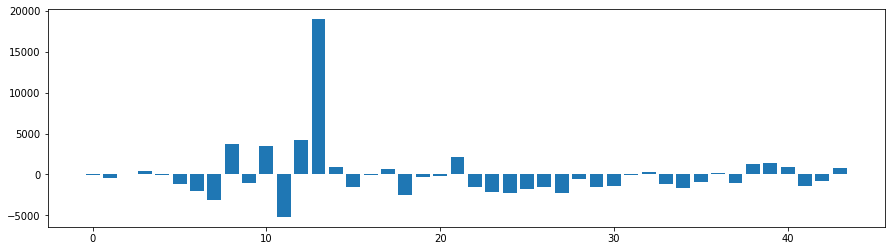

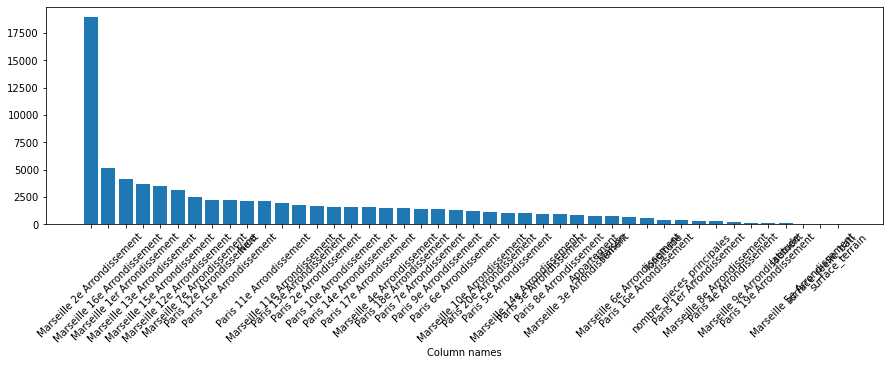

/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/reestimator/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [43]:
df_new = data_t4.copy()
cols = list(df_new.columns)

columns_todrop = ['id_mutation', 'date_mutation',
         'adresse_nom_voie', 'adresse_code_voie',
  'code_commune', 'code_postal',
 'code_departement',
 'id_parcelle', 'valeur_fonciere',
 ]

for i in columns_todrop:
    cols.remove(i)
    
cols_removd_target = cols[:]
cols_removd_target.remove('prixmetre')

data_v2 = df_new[cols]

result, sorted_VIF, columns_todrop = feature_selection(df = data_v2, col_list = cols_removd_target,
                         target_var = "prixmetre", model = "LinearRegression")

In [44]:
result

,columns,coef_(%)
0,Marseille 2e Arrondissement,1.000000
1,Marseille 16e Arrondissement,0.273332
2,Marseille 1er Arrondissement,0.219931
3,Marseille 13e Arrondissement,0.194814
4,Marseille 15e Arrondissement,0.186303
5,Marseille 12e Arrondissement,0.165753
6,Marseille 7e Arrondissement,0.129488
7,Paris 12e Arrondissement,0.117355
8,Paris 15e Arrondissement,0.116073
9,Nice,0.114317


In [45]:
sorted_VIF

,Features,VIF
22,Paris 10e Arrondissement,inf
33,Paris 20e Arrondissement,inf
25,Paris 13e Arrondissement,inf
26,Paris 14e Arrondissement,inf
27,Paris 15e Arrondissement,inf
28,Paris 16e Arrondissement,inf
29,Paris 17e Arrondissement,inf
30,Paris 18e Arrondissement,inf
31,Paris 19e Arrondissement,inf
32,Paris 1er Arrondissement,inf


**Looking at sorted_VIF dataframe, there are Inf, That means there are colinearity between nom_commune**

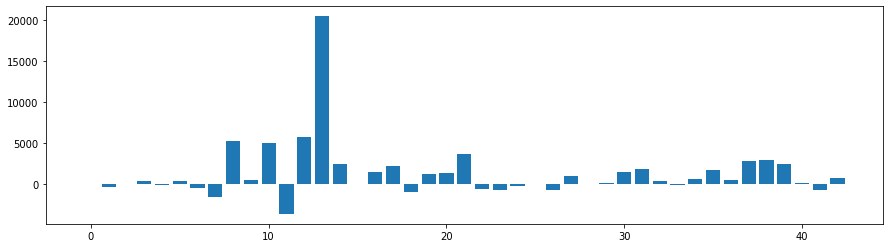

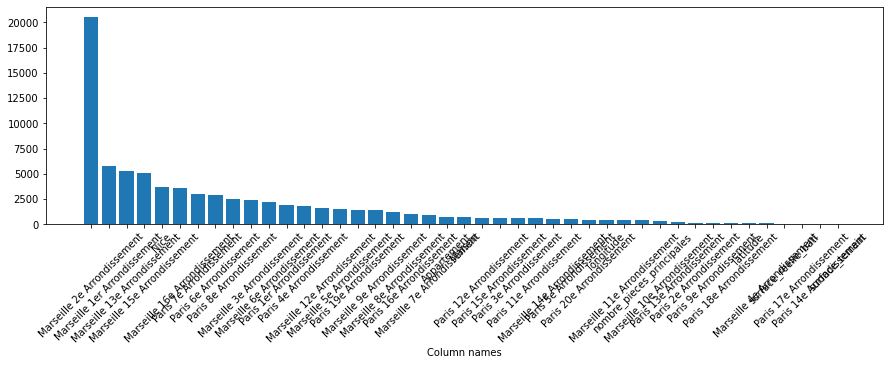

In [46]:
df_new = data_t4.copy()
cols = list(df_new.columns)

columns_todrop = ['id_mutation', 'date_mutation',
         'adresse_nom_voie', 'adresse_code_voie',
  'code_commune', 'code_postal',
 'code_departement',
 'id_parcelle', 'valeur_fonciere', 'Paris 10e Arrondissement'
 ]


for i in columns_todrop:
    cols.remove(i)
    
cols_removd_target = cols[:]
cols_removd_target.remove('prixmetre')

data_v2 = df_new[cols]

result, sorted_VIF, columns_todrop = feature_selection(df = data_v2, col_list = cols_removd_target,
                         target_var = "prixmetre", model = "LinearRegression")

In [47]:
result

,columns,coef_(%)
0,Marseille 2e Arrondissement,1.000000
1,Marseille 1er Arrondissement,0.279147
2,Marseille 13e Arrondissement,0.255937
3,Marseille 15e Arrondissement,0.248072
4,Nice,0.181551
5,Marseille 16e Arrondissement,0.176672
6,Paris 7e Arrondissement,0.145797
7,Paris 6e Arrondissement,0.140987
8,Paris 8e Arrondissement,0.121915
9,Marseille 3e Arrondissement,0.117577


In [48]:
sorted_VIF

,Features,VIF
41,Appartement,1452.579974
3,longitude,72.030261
21,Nice,57.704847
42,Maison,18.012365
18,Marseille 7e Arrondissement,5.603625
4,latitude,5.506886
19,Marseille 8e Arrondissement,4.972452
0,surface_reelle_bati,4.319251
12,Marseille 1er Arrondissement,4.228019
17,Marseille 6e Arrondissement,4.113066


In [52]:
def apply_regression_model(df, col_list, target_var ,model):
        
    #by default, col_list = cols_removd_target
    #target_var = 'valeur_fonciere'
        
    # define dataset
    y = df[target_var]
    X = df[col_list]
    
    
    #instantiating train test split while creating my X and y train and test variables
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

    #instantiating the standard scaler and setting it equal to ss
    #scaling my Xs
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_sc = scaler.transform(X_train)
    X_test_sc = scaler.transform(X_test)

    for model in models:
        linear = model.fit(X_train_sc,y_train)
            
        # Use the model on the testing data to predict the results
        y_pred = linear.predict(X_test_sc)
        print("model : ", model)

        # Print the R2 score 
        print ("R2 score:") 
        print (('{:.2f}'.format((100*(r2_score(y_test, y_pred))))) + " %", "\n")

        # Print the mean squared error
        print ("Mean-squared error:")
        print(rmse(y_test, y_pred), "\n")

        # Print the mean absolute error
        print ("Mean-absolute error:")
        print(mape(y_test, y_pred))
        print(11*"** **")
        
        
la= Lasso()
ri = Ridge()
lr = LinearRegression()
models = [la,ri,lr]
    
apply_regression_model(df = data_v2, col_list = cols_removd_target,
                         target_var = "prixmetre", model = models)

model :  Lasso()
R2 score:
3.68 % 

Mean-squared error:
80401110.20262624 

Mean-absolute error:
0.22780326187764943
** **** **** **** **** **** **** **** **** **** **** **
model :  Ridge()
R2 score:
3.67 % 

Mean-squared error:
80406809.8628185 

Mean-absolute error:
0.22781203723752255
** **** **** **** **** **** **** **** **** **** **** **
model :  LinearRegression()
R2 score:
3.68 % 

Mean-squared error:
80405062.38484327 

Mean-absolute error:
0.22781348926111253
** **** **** **** **** **** **** **** **** **** **** **


# Function

In [138]:
reg = 2
forest = 2
xgboost = 2

randomsearch_dict = {"reg_iter": reg,
                  "forest_iter": forest,
                   "xgboost_iter": xgboost} 

In [140]:
#Example of parameters for randomsearch for Ridge and Lasso models :**
# LinearRegession() is equivalent to Lasso() with alpha = 0
params_cv_reg = dict()
params_cv_reg['alpha'] = list(range(3)) 
params_cv_reg['fit_intercept'] = [True, False]
params_cv_reg['normalize'] = [False, True]

In [141]:
#Example of parameters for randomsearch for Randomforest model :**
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 20, num = 3)] # number of trees 
                                                                                    #in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 3)] # maximum number of levels
                                                                        #allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

params_cv_forest = {'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'bootstrap': bootstrap}

In [142]:
#Example of parameters for randomsearch for XGBoost model :**
        
params_cv_xgboost = {"learning_rate": (0.05, 0.10, 0.15),
                  "max_depth": [ 3, 4, 5, 6, 8],
              "min_child_weight": [ 1, 3, 5, 7],
              "gamma":[ 0.0, 0.1, 0.2],
          "colsample_bytree":[ 0.3, 0.4]}

In [237]:
def training_regression_models(df, col_list, target_var, scaler,model,params_cv, randomsearch_dict,  nsplits = 10, scor = "neg_mean_absolute_error"):
        
    #df: dataframe
    # col_lis : list of features tu use in training
    
    #by default, col_list = cols_removd_target
    #target_var = 'prixmetre' " old one -----> 'valeur_fonciere' "
    
    # scaler = StandardScaler() "we can use RobustScaler()"
    # model : "LinearRegression", "RandomForest", "XGBoost"
    # params : dict for GridSearch ; we do not use it for this initial version
    # nsplits, nrepeats : arguments in RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # randomsearch_reg_iter --> Please see, RandomizedSearchCV(model, params, n_iter=randomsearch_reg_iter, ..
        #by default n_iter = 500
        
    #randomsearch_xgboost_iter --> Please see, RandomizedSearchCV(estimator = xgboost_regression, ..., n_iter = randomsearch_xgboost_iter
        
    """
      ** Iteration numbers for randomsearch for models Ridge, Lasso, RandomForest
      
        reg = 2
        forest = 2
        xgboost = 2

        randomsearch_dict = {"reg_iter": reg,
                          "forest_iter": forest,
                           "xgboost_iter": xgboost} 
                         
        **Example of parameters for randomsearch for Linear regression model :**
        # define search params
        params = dict()
        params['alpha'] = list(range(3)) 
        params['fit_intercept'] = [True, False]
        params['normalize'] = [False, True]

    
        **Example of parameters for randomsearch for Randomforest model :**
        n_estimators = [int(x) for x in np.linspace(start = 1, stop = 20, num = 3)] # number of trees 
                                                                                    #in the random forest
        max_features = ['auto', 'sqrt'] # number of features in consideration at every split
        max_depth = [int(x) for x in np.linspace(10, 120, num = 3)] # maximum number of levels
                                                                        #allowed in each decision tree
        min_samples_split = [2, 6, 10] # minimum sample number to split a node
        min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
        bootstrap = [True, False] # method used to sample data points
        
        params_cv = {'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'bootstrap': bootstrap}
        
        **Example of parameters for randomsearch for XGBoost model :**
        
         params_cv = {"learning_rate": (0.05, 0.10, 0.15),
                        "max_depth": [ 3, 4, 5, 6, 8],
                        "min_child_weight": [ 1, 3, 5, 7],
                        "gamma":[ 0.0, 0.1, 0.2],
                        "colsample_bytree":[ 0.3, 0.4],}
                         
     """
    
    #scor 
    
    # define dataset
    y = df[target_var]
    X = df[col_list]
    
    
    #instantiating train test split while creating my X and y train and test variables
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

    #instantiating the standard scaler and setting it equal to ss
    #scaling my Xs
    
    scaler.fit(X_train)
    X_train_sc = scaler.transform(X_train)
    X_test_sc = scaler.transform(X_test)
    
    # define model
    if model == "LinearRegression":
        
        la= Lasso()
        ri = Ridge()
        #lr = LinearRegression()
        models = [la,ri] #[la,ri,lr]
        
        feature_importances = {} # dict Keys :(la, ri and lr) models , values : .coef_
        result = {'Lasso': {}, "Ridge" : {}} # dict Keys :(XGBoost) model , values : result after RandomizedSearchCV
        
        for model in models:
            
            # define search          
            print("****  RandomizedSearchCV  ****")
            # define evaluation
            cv = KFold(n_splits=nsplits)
            
            search = RandomizedSearchCV(model, params_cv, n_iter=randomsearch_dict['reg_iter'], 
                                        scoring= scor, n_jobs=-1, 
                                        cv=cv, random_state=1)
            
            # execute search
            res = search.fit(X_train_sc, y_train)
            print(res)
            # summarize result
            print('Best Score: %s' % res.best_score_)
            print('Best Hyperparameters: %s' % res.best_params_)
            
            model = model.set_params(**res.best_params_)
            print("model  ", model)

            
            linear = model.fit(X_train_sc,y_train)
            
            # Use the model on the testing data to predict the results
            y_pred = linear.predict(X_test_sc)

            # Print the R2 score 
            print ("R2 score:\n") 
            print (('{:.2f}'.format((100*(r2_score(y_test, y_pred))))) + " %")

            # Print the mean squared error
            print ("Mean-squared error:\n")
            print(rmse(y_test, y_pred))

            # Print the mean absolute error
            print ("Mean-absolute error:\n")
            print(mape(y_test, y_pred))
            print(11*"** **")
            
            feature_importances[str(model)] = linear.coef_
            
            # for each model, we add a RandomizedSearchCV
            if model == la:
                #return feature_importances, result
                result["Lasso"]['r2'] = 100*(r2_score(y_test, y_pred))
                result["Lasso"]['mape'] = mape(y_test, y_pred)
                result["Lasso"]['rmse'] = rmse(y_test, y_pred)

            if model == ri:
                result["Ridge"]['r2'] = 100*(r2_score(y_test, y_pred))
                result["Ridge"]['mape'] = mape(y_test, y_pred)
                result["Ridge"]['rmse'] = rmse(y_test, y_pred)


            
    if model == "RandomForest":    
        
        print("****  RandomizedSearchCV  ****")
        
        result = {'RandomForest': {}} # dict Keys :(XGBoost) model , values : result after RandomizedSearchCV
                      
        random_forest = RandomForestRegressor(random_state = 42)
        
        search = RandomizedSearchCV(estimator = random_forest, param_distributions = params_cv,
               n_iter = randomsearch_dict['forest_iter'], cv = 5, verbose=2, random_state=42, n_jobs = -1)
        
        # execute search
        res = search.fit(X_train_sc, y_train)
        # summarize result
        print('Best Score: %s' % res.best_score_)
        print('Best Hyperparameters: %s' % res.best_params_)
        
        random_forest = random_forest.set_params(**res.best_params_)
        
        #Fitting the Random Forest model
        random_forest.fit(X_train_sc,y_train)

        # Use the model on the testing data to predict the results
        y_pred = random_forest.predict(X_test_sc)
        
        # Print the R2 score 
        print ("R2 score:\n") 
        print (('{:.2f}'.format((100*(r2_score(y_test, y_pred))))) + " %")
        
        # Print the mean squared error
        print ("Mean-squared error:\n")
        print(rmse(y_test, y_pred))

        # Print the mean absolute error
        print ("Mean-absolute error:\n")
        print(mape(y_test, y_pred))


        feature_importances = pd.DataFrame(random_forest.feature_importances_,
                                       index = X_train.columns,
                                       columns=['importance']).sort_values('importance', ascending=False)

        #print(feature_importances)
        
        # RandomizedSearchCV
        
        #return feature_importances, result
        
        result["RandomForest"]['r2'] = 100*(r2_score(y_test, y_pred))
        result["RandomForest"]['mape'] = mape(y_test, y_pred)
        result["RandomForest"]['rmse'] = rmse(y_test, y_pred)
            

       
    if model == "XGBoost":
        
        print("****  RandomizedSearchCV  ****")
        result = {'XGBoost': {}} # dict Keys :(XGBoost) model , values : result after RandomizedSearchCV

              
        xgboost_regression = xgb.XGBRegressor(booster = 'gbtree', objective ='reg:squarederror', 
                                    colsample_bytree = 0.3, learning_rate = 0.35,
          max_depth = 10, alpha = 0.1, n_estimators = 500)
        
        search = RandomizedSearchCV(estimator = xgboost_regression, 
                           param_distributions = params_cv, 
                           n_iter = randomsearch_dict['xgboost_iter'], cv = 3, verbose=2, #n_iter=1000
                           random_state=0, n_jobs = -1)     
        
        #Fitting the Random Forest model
        res = search.fit(X_train_sc,y_train)
        
        # summarize result
        print('Best Score: %s' % res.best_score_)
        print('Best Hyperparameters: %s' % res.best_params_)
        
        xgboost_regression = xgboost_regression.set_params(**res.best_params_)
       
        #Fitting the XGBoost model
        xgboost_regression.fit(X_train_sc,y_train)

        # Use the model on the testing data to predict the results
        y_pred = xgboost_regression.predict(X_test_sc)
        
        # Print the R2 score 
        print ("R2 score:\n") 
        print (('{:.2f}'.format((100*(r2_score(y_test, y_pred))))) + " %")
        
        # Print the mean squared error
        print ("Mean-squared error:\n")
        print(rmse(y_test, y_pred))

        # Print the mean absolute error
        print ("Mean-absolute error:\n")
        print(mape(y_test, y_pred))
        
        feature_importances = pd.DataFrame(xgboost_regression.feature_importances_,
                                       index = X_train.columns,
                                       columns=['importance']).sort_values('importance', ascending=False)
        
        
        #return feature_importances, result
        
        result["XGBoost"]['r2'] = 100*(r2_score(y_test, y_pred))
        result["XGBoost"]['mape'] = mape(y_test, y_pred)
        result["XGBoost"]['rmse'] = rmse(y_test, y_pred)
        

        #print(feature_importances)
        fig, ax = plt.subplots(figsize=(17, 7))
        plot_importance(xgboost_regression, ax = ax)
        plt.show()
          
    return feature_importances, result



## Lasso() & Ridge()

In [238]:
df_new = data_t4.copy()
cols = list(df_new.columns)

columns_todrop = ['id_mutation', 'date_mutation',
         'adresse_nom_voie', 'adresse_code_voie',
  'code_commune', 'code_postal',
 'code_departement',
 'id_parcelle', 'valeur_fonciere', 'Paris 10e Arrondissement'
 ]


for i in columns_todrop:
    cols.remove(i)
    
cols_removd_target = cols[:]
cols_removd_target.remove('prixmetre')

data_v2 = df_new[cols]


reg = 2
forest = 2
xgboost = 2

randomsearch_dict = {"reg_iter": reg,
                  "forest_iter": forest,
                   "xgboost_iter": xgboost} 

#Example of parameters for randomsearch for Ridge and Lasso models :**
# LinearRegession() is equivalent to Lasso() with alpha = 0
params_cv_reg = dict()
params_cv_reg['alpha'] = list(range(3)) 
params_cv_reg['fit_intercept'] = [True, False]
params_cv_reg['normalize'] = [False, True]


feature_importances, result = training_regression_models(df = data_v2, 
                                                             col_list = cols_removd_target,
                                                             target_var = "prixmetre" ,
                                                         scaler = StandardScaler(),
                                                        model="LinearRegression",
                                                         params_cv= params_cv_reg,
                                                         randomsearch_dict = randomsearch_dict,
                                                        nsplits = 2, 
                                                    scor = "neg_mean_absolute_error")
           

****  RandomizedSearchCV  ****


/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/reestimator/lib/python3.8/site-packages/sklearn/model_selection/_search.py:880: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/reestimator/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/reestimator/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6743050775441.529, tolerance: 1366399939.7686615
  model = cd_fast.enet_coordinate_descent(
/var/folders/5y/6hfgq7bn3rxfh24y7vqbgg7w0000gn/T/ipykernel_61987/16

RandomizedSearchCV(cv=KFold(n_splits=2, random_state=None, shuffle=False),
                   estimator=Lasso(), n_iter=2, n_jobs=-1,
                   param_distributions={'alpha': [0, 1, 2],
                                        'fit_intercept': [True, False],
                                        'normalize': [False, True]},
                   random_state=1, scoring='neg_mean_absolute_error')
Best Score: -14141.173954012736
Best Hyperparameters: {'normalize': False, 'fit_intercept': False, 'alpha': 0}
model   Lasso(alpha=0, fit_intercept=False)


/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/reestimator/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6743050775441.529, tolerance: 1366399939.7686615
  model = cd_fast.enet_coordinate_descent(


R2 score:

-235.13 %
Mean-squared error:

279744124.38850623
Mean-absolute error:

1.010668607006497
** **** **** **** **** **** **** **** **** **** **** **
****  RandomizedSearchCV  ****
RandomizedSearchCV(cv=KFold(n_splits=2, random_state=None, shuffle=False),
                   estimator=Ridge(), n_iter=2, n_jobs=-1,
                   param_distributions={'alpha': [0, 1, 2],
                                        'fit_intercept': [True, False],
                                        'normalize': [False, True]},
                   random_state=1, scoring='neg_mean_absolute_error')
Best Score: -12679.058206306068
Best Hyperparameters: {'normalize': False, 'fit_intercept': False, 'alpha': 0}
model   Ridge(alpha=0, fit_intercept=False)
R2 score:

-2467.08 %
Mean-squared error:

2142857983.3541954
Mean-absolute error:

1.0803585787132781
** **** **** **** **** **** **** **** **** **** **** **


In [235]:
result

{'Lasso': {'r2': -235.12574912546717,
  'mape': 1.010668607006497,
  'rmse': 279744124.38850623},
 'Ridge': {'r2': -2467.08479046993,
  'mape': 1.0803585787132781,
  'rmse': 2142857983.3541954}}

## RandomForest

In [224]:
df_new = data_t4.copy()
cols = list(df_new.columns)

columns_todrop = ['id_mutation', 'date_mutation',
         'adresse_nom_voie', 'adresse_code_voie',
  'code_commune', 'code_postal',
 'code_departement',
 'id_parcelle', 'valeur_fonciere', 'Paris 10e Arrondissement'
 ]


for i in columns_todrop:
    cols.remove(i)
    
cols_removd_target = cols[:]
cols_removd_target.remove('prixmetre')

data_v2 = df_new[cols]


reg = 2
forest = 2
xgboost = 2

randomsearch_dict = {"reg_iter": reg,
                  "forest_iter": forest,
                   "xgboost_iter": xgboost} 



#Example of parameters for randomsearch for Randomforest model :**
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 20, num = 3)] # number of trees 
                                                                                    #in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 3)] # maximum number of levels
                                                                        #allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

params_cv_forest = {'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'bootstrap': bootstrap}


feature_importances, result = training_regression_models(df = data_v2, 
                                                             col_list = cols_removd_target,
                                                             target_var = "prixmetre" ,
                                                         scaler = StandardScaler(),
                                                        model="RandomForest",
                                                         params_cv= params_cv_forest,
                                                         randomsearch_dict = randomsearch_dict,
                                                        nsplits = 2, 
                                                    scor = "neg_mean_absolute_error")
           

****  RandomizedSearchCV  ****
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Score: 0.040678388445020676
Best Hyperparameters: {'n_estimators': 1, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 65, 'bootstrap': True}
R2 score:

4.25 %
Mean-squared error:

79925563.1849003
Mean-absolute error:

0.23252310898892378


In [225]:
result

{'RandomForest': {'r2': 4.251378665542093,
  'mape': 0.23252310898892378,
  'rmse': 79925563.1849003}}

## XGBoost

****  RandomizedSearchCV  ****
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best Score: 0.23050623124868494
Best Hyperparameters: {'min_child_weight': 7, 'max_depth': 4, 'learning_rate': 0.15, 'gamma': 0.0, 'colsample_bytree': 0.3}
R2 score:

22.70 %
Mean-squared error:

64524432.45013688
Mean-absolute error:

0.2032789716933371


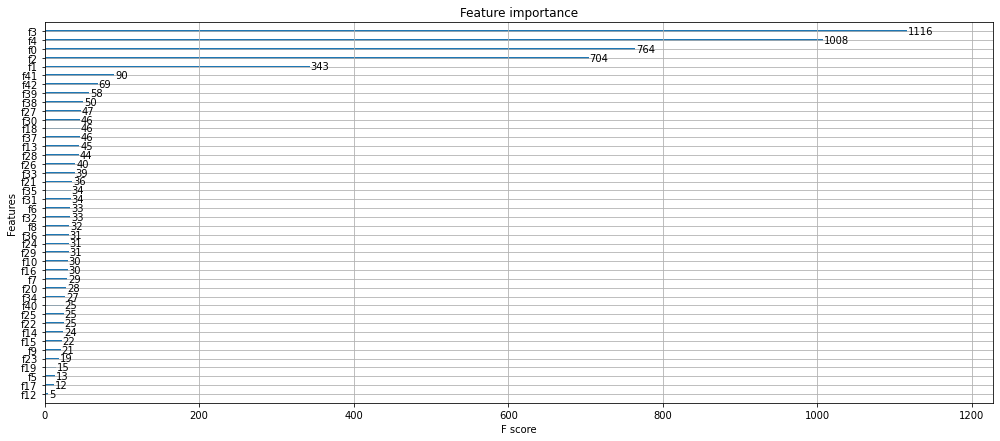

In [231]:
df_new = data_t4.copy()
cols = list(df_new.columns)

columns_todrop = ['id_mutation', 'date_mutation',
         'adresse_nom_voie', 'adresse_code_voie',
  'code_commune', 'code_postal',
 'code_departement',
 'id_parcelle', 'valeur_fonciere', 'Paris 10e Arrondissement'
 ]


for i in columns_todrop:
    cols.remove(i)
    
cols_removd_target = cols[:]
cols_removd_target.remove('prixmetre')

data_v2 = df_new[cols]


reg = 2
forest = 2
xgboost = 2

randomsearch_dict = {"reg_iter": reg,
                  "forest_iter": forest,
                   "xgboost_iter": xgboost} 



#Example of parameters for randomsearch for XGBoost model :**
        
params_cv_xgboost = {"learning_rate": (0.05, 0.10, 0.15),
                  "max_depth": [ 3, 4, 5, 6, 8],
              "min_child_weight": [ 1, 3, 5, 7],
              "gamma":[ 0.0, 0.1, 0.2],
          "colsample_bytree":[ 0.3, 0.4]}

feature_importances, result = training_regression_models(df = data_v2, 
                                                             col_list = cols_removd_target,
                                                             target_var = "prixmetre" ,
                                                         scaler = StandardScaler(),
                                                        model="XGBoost",
                                                         params_cv= params_cv_xgboost,
                                                         randomsearch_dict = randomsearch_dict,
                                                        nsplits = 2, 
                                                    scor = "neg_mean_absolute_error")
           

In [232]:
result

{'XGBoost': {'r2': 22.701508712594876,
  'mape': 0.2032789716933371,
  'rmse': 64524432.45013688}}